### 1. Import data and libraries

In [21]:
conda install seaborn matplotlib scipy

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [23]:
path = r'C:\Users\alber\Instacart Basket Analysis'

In [24]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_merged_new.pkl'))

## Creating Bar Charts 

<AxesSubplot:>

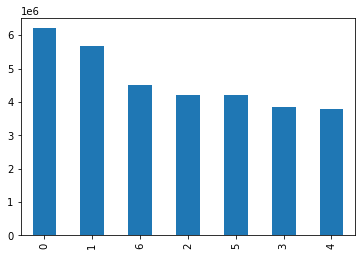

In [25]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

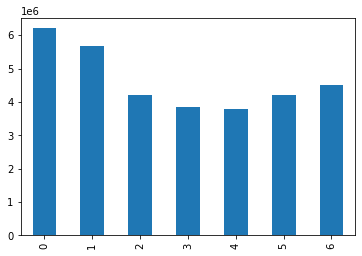

In [26]:
# Sorting index rather than sorting in descending order

bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Orders per Day of Week')
plt.xlabel('Days of Week')
plt.ylabel('Orders (in millions)')
plt.show()

In [27]:
ords_prods_merge['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [28]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

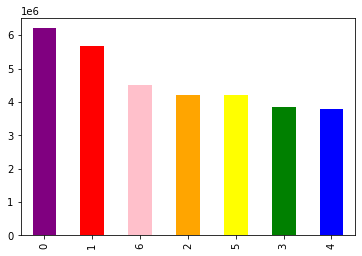

In [29]:
# To add color to chart 


bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

## Exporting Charts

In [30]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

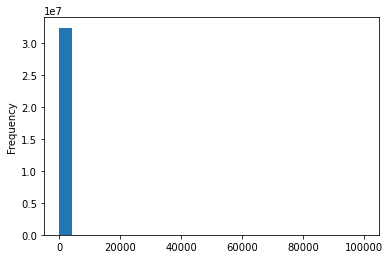

In [31]:
ords_prods_merge['prices'].plot.hist(bins=25)

In [32]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [33]:
ords_prods_merge['prices'].mean()

11.980225638467232

In [34]:
ords_prods_merge['prices'].median()

7.4

In [35]:
ords_prods_merge['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

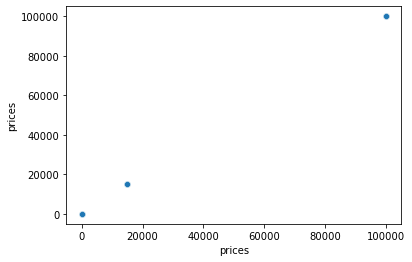

In [36]:
# Creating a scatterplot

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [37]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day
10030345,912404,17,12,2,14,5.0,False,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Most orders
10030346,603376,17,22,6,16,4.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Most orders
10030347,3264360,135,2,2,21,13.0,False,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Average orders
10030348,892534,135,3,0,8,12.0,False,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest day,Busiest days,Average orders
10030349,229704,342,8,1,19,30.0,False,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Busiest days,Average orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,False,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Average orders
29166210,2363282,204099,31,0,9,2.0,False,33664,1,1,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest days,Most orders
29166211,3181945,204395,13,3,15,8.0,False,33664,25,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Slowest days,Most orders
29166212,2486215,205227,7,3,20,4.0,False,33664,8,0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Slowest days,Average orders


In [38]:
# Turn outliers into missing values (NaNs)

ords_prods_merge.loc[ords_prods_merge['prices']>100, 'prices'] = np.nan

In [39]:
ords_prods_merge['prices'].max()

25.0

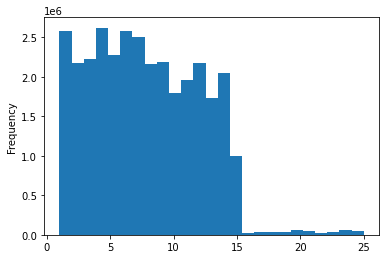

In [40]:
hist = ords_prods_merge['prices'].plot.hist(bins=25)
plt.title('Orders per Price Bracket Historgram')
plt.xlabel('Prices (in $)')
plt.ylabel('Orders (in millions)')
plt.show()

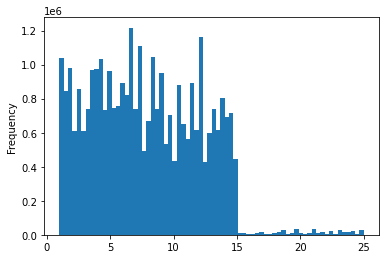

In [41]:
# Increasing bin sizes makes columns much thinner

hist2 = ords_prods_merge['prices'].plot.hist(bins=70)

## Creating Line Charts

In [43]:
df = ords_prods_merge[:2000000]

# Line charts require a lot of compuiting power

In [45]:
# Step 1: Create random sample
# Creating a list holding True/False values to test np.random.rant() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [46]:
# 0.7 is to split dataframe into two dataframes at 70/30 ratio
# First line is to set "seed" to represet a random but reproducible pattern

In [49]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [51]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [52]:
# Checking expected results

len(ords_prods_merge)

32404859

In [53]:
len(big) + len(small)

32404859

In [54]:
df_2 = small[['orders_day_of_week','prices']]

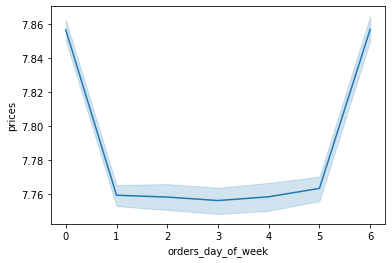

In [57]:
line = sns.lineplot(data = df_2, x='orders_day_of_week',y='prices')
plt.title('Prices per Day of Week')
plt.xlabel('Days of Week')
plt.ylabel('Prices (in $)')
plt.show()

In [58]:
df_4 = ords_prods_merge[['orders_day_of_week','prices']]

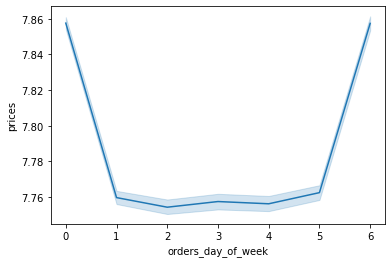

In [59]:
line_2 = sns.lineplot(data = df_4, x= 'orders_day_of_week', y = 'prices')